# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 4</font>

## Exercícios 

Hora de praticar um pouco. Resolva as questões a seguir e consulte a documentação Python se necessário! 

A solução será apresentada no próximo capítulo.

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
from datetime import datetime

In [5]:
# O dataset contém registros de corridas de táxi
df = pd.read_csv('dados/dataframe.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [6]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [7]:
df.sort_index(inplace = True)
df.sample(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
27,2015-08-27,2.50,0:25:00,1500.0,25.000000,10.000000
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437
61,2015-11-10,1.50,0:11:33,693.0,11.550000,7.700000
28,2015-08-29,5.00,0:43:27,2607.0,43.450000,8.690000
43,2015-10-04,1.87,NaN,NaN,NaN,NaN
69,2015-12-13,2.21,0:18:59,1139.0,18.983333,8.589744
39,2015-09-28,1.50,0:11:18,678.0,11.300000,7.533333
67,2015-12-12,1.37,0:09:15,555.0,9.250000,6.751825
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
35,2015-09-16,3.05,0:22:48,1368.0,22.800000,7.475410


#### Exercício 1 - Qual o valor máximo da coluna Minutos?

In [8]:
minutos_max = df['Minutos'].max()
print(f"\n01 - Valor máximo da coluna minutos: {round(minutos_max,2)} minutos\n")


01 - Valor máximo da coluna minutos: 260.72 minutos



#### Exercício 2 - Qual o valor mínimo de distância acima de 2.0?

In [41]:
distancia_min = df.Distancia[df['Distancia'] > 2].min()
distancia_min

2.01

#### Exercício 3 - Crie um plot com a frequência acumulada da coluna Distancia.

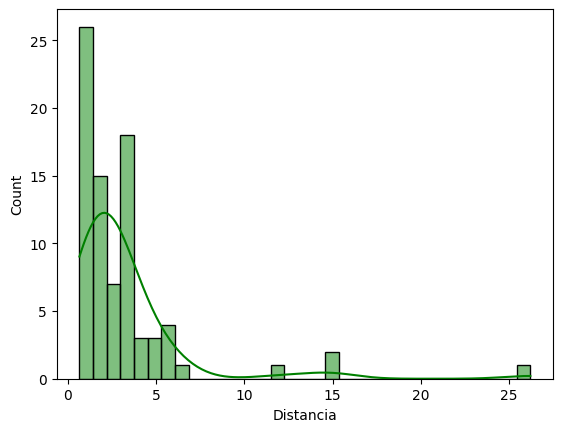

In [13]:
sns.histplot(x = df['Distancia'], kde = True, color = 'green');

<Axes: >

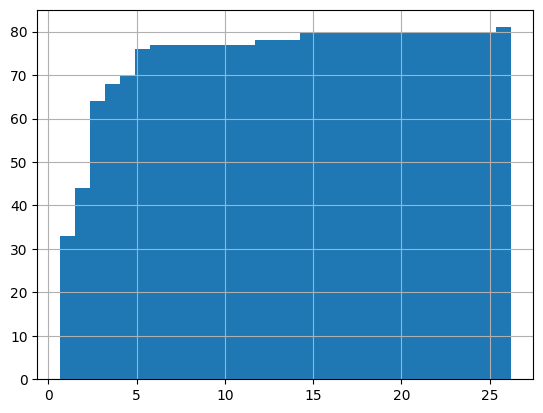

In [42]:
df['Distancia'].hist(bins = 30, cumulative =True)

#### Exercício 4 - Qual o dia da semana no índice de posição zero?

In [28]:
data = pd.to_datetime(df.Data[0])
dia_da_semana = data.strftime("%A") #%A = nome do dia da semana
dia_da_semana

'Sunday'

#### Exercício 5 - Qual o dia da semana nos índices nas 5 primeiras posições?

In [39]:
df.Data.map(lambda x: x.strftime("%A")).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

#### Exercício 6 - Extraia todos os dias da semana (em formato texto) e insira em uma nova coluna no dataframe df.

In [44]:
# Criando nova coluna
df['Dia_Semana'] = df.Data.map(lambda x: x.strftime("%A"))
df

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km,Dia_Semana
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday
...,...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437,Thursday
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459,Friday
78,2015-12-26,5.20,NaN,NaN,NaN,NaN,Saturday
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037,Wednesday


#### Exercício 7 - Crie um gráfico de barras com o total da distância percorrida em cada dia da semana.

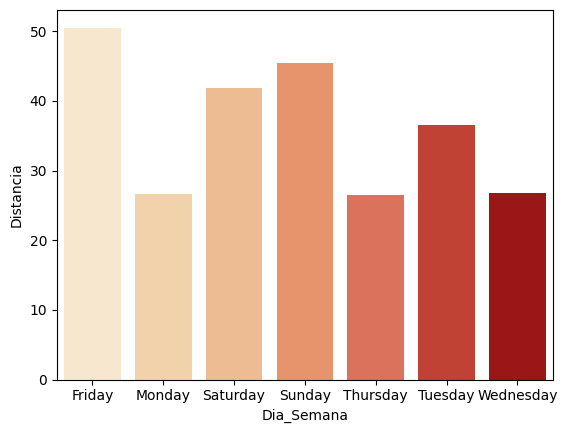

In [48]:
df_dist_diaSemana = df.groupby('Dia_Semana')['Distancia'].sum().reset_index()
df_dist_diaSemana

sns.barplot()

# Plotagem 
ax = sns.barplot(x='Dia_Semana', y='Distancia', data=df_dist_diaSemana, palette='OrRd')


#### Exercício 8 - Delete a coluna Tempo do dataframe df.

#### Exercício 9 - Qual o total de corridas de taxi por dia da semana?

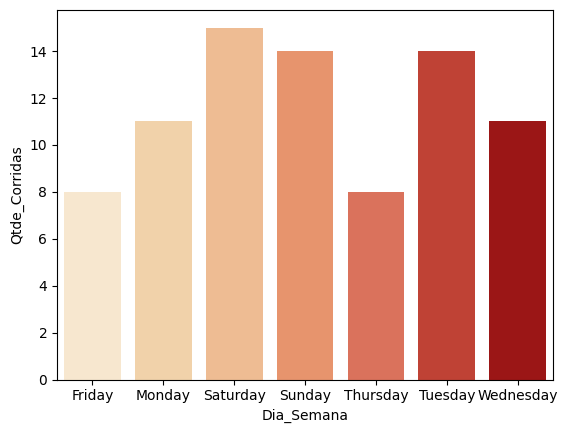

In [60]:
total_corridas_por_dia = df.groupby('Dia_Semana')['Data'].count().reset_index()
total_corridas_por_dia.columns = ['Dia_Semana', 'Qtde_Corridas']
total_corridas_por_dia

sns.barplot(x='Dia_Semana', y='Qtde_Corridas', data=total_corridas_por_dia, palette='OrRd');


#### Exercício 10 - Qual a média para cada uma das colunas por dia da semana?

In [61]:
df.columns


Index(['Data', 'Distancia', 'Segundos', 'Minutos', 'Min_Por_Km', 'Dia_Semana'], dtype='object')

In [63]:
media_por_dia = df.groupby('Dia_Semana')[['Distancia', 'Segundos', 'Minutos', 'Min_Por_Km']]\
                .agg(['mean']).reset_index().round(2)

media_por_dia

,Dia_Semana,Distancia,Segundos,Minutos,Min_Por_Km
,,mean,mean,mean,mean
0,Friday,6.32,5071.80,84.53,8.04
1,Monday,2.42,1185.75,19.76,7.46
2,Saturday,2.79,1458.50,24.31,7.75
3,Sunday,3.25,2802.50,46.71,8.18
4,Thursday,3.32,1681.29,28.02,7.83
5,Tuesday,2.61,1334.60,22.24,7.46
6,Wednesday,2.43,1306.25,21.77,7.66


## FIM